# 힙합(HipHop) 분류


In [ ]:
import json
import os
import math
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 JSON 파일에 음성 sample rate 값 저장

In [ ]:
DATASET_PATH = "/content/data_new.json"
JSON_PATH = "data_new.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 60 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
um_mfcc=13
n_fft=2048
hop_length=512
num_segments=3

Mapping, 라벨, Mfcc 값 data 딕셔너리에 저장

In [ ]:
data ={
     "mapping" : [],
     "labels": [],
     "mfcc": []
 }

In [ ]:
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

# 1.데이터 셋에 있는 음악을 json 파일로 저장 후 장르 별로 나눈다

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=1):
  """:dataset_path: 데이터 셋의 path
  : json_path: MFCC값을 json파일로 변환 후 저장하는 Path
  : num_mfcc: 뽑아야 하는 결정계수 수
  : n_fft: FFT를 적용할 때 사용하는 간격
  : hop_length: FFT를 적용할 때 window값
  :num_segments: sample track을 몇개의 segment로 분할할 지"
    """
        
    # mapping, label, mfcc 값 딕셔너리 생성
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # genre에 속한 모든 sub-folder에 루프를 돈다
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # genre sub-folder에 해당하도록 한다.
        if dirpath is not dataset_path:

            # 장르의 라벨(sub-folder의 제목)을 mapping 딕셔너리 안에 저장한다.
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # genre sub-folder에 있는 모든 오디오 파일을 연다.
            for f in filenames:

		# 오디오 파일을 로딩한다
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # 오디오 segment에 해당하는 모든 segment를 진행 시킨다
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # mfcc 값을 추출한다
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # 오직 필요로 하는 mfcc 값만 추출한다.
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # Mfcc 값을 json파일에 저장한다
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

#Enumerate 함수

enumerate 함수는 기본적으로 인덱스와 원소로 나눠 튜플 형태로 만들어준다.

ex)
for i letter in enumerate(['A','B','C]):
  print(i, letter)

0 A
1 B
2 C


In [ ]:
data

{'labels': [], 'mapping': [], 'mfcc': []}

저장하는 함수를 실행 시킨다.

In [ ]:
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=1)


Processing: Singing
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0004.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0003.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0007.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0005.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0006.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0001.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0002.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Sik-k_0008.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 비비(BIBI)의 킬링보이스를 라이브로!   SoWhat,나비,비누,FedexxGirl,PrettyTing,FEVER,Te Quiero,자국,쉬가릿_0007.wav, segment:1
/content/gdrive/Shareddrives/인공지능 ᄀ

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0002.mp3, segment:1


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0003.mp3, segment:1


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0004.mp3, segment:1


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0005.mp3, segment:1


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0006.mp3, segment:1


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0010.mp3, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0006 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0007 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0002 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0004 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0001 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/BrownTigger_0010 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Homies_0001 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/Homies

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Singing/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0009.mp3, segment:1

Processing: Boombap
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/[4K] YDG(양동근)의 킬링벌스를 라이브로!   죄인,레인보우,거울,Hallelujah,아버지,만선,BM,GITM,선문답,RUN,땡큐땡큐,JAJAJA 등_0006 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/[4K] 나플라의 킬링벌스를 라이브로!   Wu, Jail, locked and loaded, 사과상자, B.I.G., FLEX, takeover_0003.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/[4K] YDG(양동근)의 킬링벌스를 라이브로!   죄인,레인보우,거울,Hallelujah,아버지,만선,BM,GITM,선문답,RUN,땡큐땡큐,JAJAJA 등_0006.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/[4K] YDG(양동근)의 킬링벌스를 라이브로! 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1200
  n_fft, y.shape[-1]


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0001.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0004.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0003.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0002.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0006.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0008.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0007.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0012.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/IGNITO_0011.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/Legitgoons_0001.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Boombap/

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0007 (1).mp3, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 사이먼 도미닉의 킬링벌스를 라이브로!   The Triumph H.I.M.A.N Lonely Night 에헤이 노땡큐 니알내알 귀가본능 B.N.G DAx4 GOTT_0008.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 릴체리(Lil Cherry)의 킬링벌스를 라이브로! I KV Freestyle, MUKKBANG!, #ALL4MYSELF, ALL-YOU-CAN-EAT, G! 등_0009.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 산이 (San E)의 킬링벌스를 라이브로!   맛좋은산, 랩 서커스, Rap Genius, Do It For Fun, 아는사람 얘기, 한여름밤의 꿀, 발라드랩, 우다잘_0004.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 래원(Layone)의 킬링벌스를 라이브로! I 원효대사

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/[4K] 애쉬 아일랜드의 킬링벌스를 라이브로!   Paranoid, 악몽, 방에 혼자 있을 때, 비워, Bition Boyz, BAND, T.T.C, Fire,Fall_0008.mp3, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Paloalto_0002 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Paloalto_0001 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Paloalto_0006 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Paloalto_0007 (1).wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Billstax_0006.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Billstax_0004.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Billstax_0007.wav, segment:1
/content/gdrive/Shareddrives/인공지능 기초/인공지능/Trap/Billstax_0008.wav, segment:1
/content/gdrive/Shareddrives/인

In [ ]:
JSON_PATH

'data_new.json'

tensorflow를 install한다

2.

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. json 파일에 있는 값을 가지고 CNN을 돌립니다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 2582, 11, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1291, 6, 32)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 1291, 6, 32)      128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 1289, 4, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 645, 2, 64)       0         
 2D)                                                             
                                                      

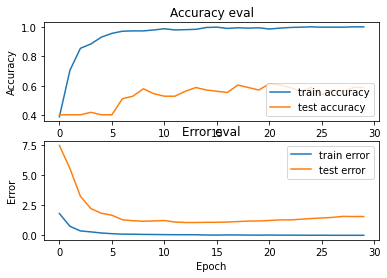

7/7 - 2s - loss: 1.2790 - accuracy: 0.6263 - 2s/epoch - 241ms/step

Test accuracy: 0.6262626051902771
Target: 1, Predicted label: [1]


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

DATA_PATH = "data_new.json"


def load_data(data_path):
  """
  json 파일에서 트레이닝 데이터 셋을 로딩 한다.
  data_path : json 파일의 path
  return X : 입력값(mfcc 값)
  return y : 타깃 값(라벨 값)
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
  """
  accuracy/loss에 대한 그래프를 그린다.
  param history: 모델의 history
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
  """
  데이타를 train, validation, test set으로 나누고 로딩을 한다.
  : param test_size: training test set의 확률값
  : param validation_size : validation set에 대한 확률값
  :return X_train : training set의 입력값
  :return X_validation : validation의 입력값
  :return X_test : test 데이터 셋의 입력값
  : return y_train : 트레이닝 데이터 셋의 타깃 값
  : return y_validaiton : validation 셋의 타깃 값
  : return y_test: 테스트 타깃 값
    """

    # 데이터를 로딩한다
    X, y = load_data(DATA_PATH)

    # test, training, validation으로 나눈다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 축을 추가해준다.(차원을 높여준다)
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
  """
  CNN 모델을 돌린다.
  : param input_shape (튜플): 입력값의 모형
  : return model: CNN 모델
  """
    # build network topology
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    # output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


def predict(model, X, y):
  """
  학습된 모델을 활용한다.
  : param model: 학습된 분류 값
  : param X: 입력값
  : param y: 타깃 값
  """
    #  입력값의 차원을 4차원으로 증가해준다
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # 예측을 실행한다.
    prediction = model.predict(X)

    # 최대 값의 index를 구한다.
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 2582, 11, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1291, 6, 32)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 1291, 6, 32)      128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 1289, 4, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 645, 2, 64)       0         
 2D)                                                             
                                                      

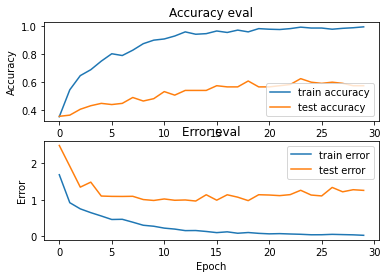

7/7 - 1s - loss: 1.3723 - accuracy: 0.5960 - 1s/epoch - 208ms/step

Test accuracy: 0.5959596037864685
Target: 2, Predicted label: [2]


In [ ]:

DATA_PATH = "data_new.json"


def load_data(data_path):
  """
  json 파일에서 트레이닝 데이터 셋을 로딩한다.
  : param data_path: json 파일에 대한  경로
  : return X: 입력값
  : return y: 타깃값
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # 정확도에 대한 subplot을 그린다.
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # loss 그래프
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
  """데이터를 train, test, validation 셋으로 나눈다.
  :parma test_size(float) : 테스트 사이즈의 비율을 나눈다
  : param validation_size : validation 셋을 비율로 나눈다.
  : return X_train: 트레이닝 셋 입력값
  : return X_validation : validation 입력값
  : return X_test : 테스트 데이터 셋의 입력값
  : return y_train : 타깃 데이터 셋
  : return y_validation : 타깃 validation set
  : return y_test: target  test set
    """

    # 데이터 로딩
    X, y = load_data(DATA_PATH)

    # training, validation, test 셋을 만든다
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 입력값들의 축을 추가한다
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
  """
  CNN 모델을 돌린다.
  : param input_shape (튜플): 입력값의 모형
  : return model: CNN 모델
  """
    # build network topology
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


def predict(model, X, y):
    """
  학습된 모델을 활용한다.
  : param model: 학습된 분류 값
  : param X: 입력값
  : param y: 타깃 값
  """
  
    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 2582, 11, 64)      640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1291, 6, 64)      0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 1291, 6, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 1289, 4, 128)      73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 645, 2, 128)      0         
 2D)                                                             
                                                      

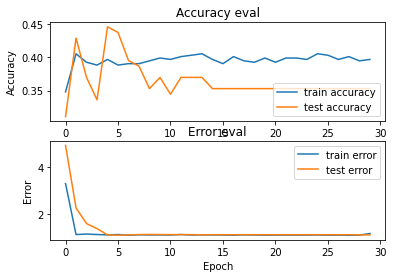

7/7 - 4s - loss: 1.0977 - accuracy: 0.4545 - 4s/epoch - 514ms/step

Test accuracy: 0.4545454680919647
Target: 2, Predicted label: [2]


In [ ]:

DATA_PATH = "data_new.json"


def load_data(data_path):
   """
  json 파일에서 트레이닝 데이터 셋을 로딩 한다.
  data_path : json 파일의 path
  return X : 입력값(mfcc 값)
  return y : 타깃 값(라벨 값)
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """
  CNN 모델을 돌린다.
  : param input_shape (튜플): 입력값의 모형
  : return model: CNN 모델
  """

    # build network topology
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())


    # 결과값을 flatten하는 작업을 하고 dense layer에 넣어준다.
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.8))

    # output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


def predict(model, X, y):

    # 입력값에 대한 차원을 증가한다. 4차원으로 만들어준다.
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 2582, 11, 64)      640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1291, 6, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 1291, 6, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 1289, 4, 128)      73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 645, 2, 128)      0         
 g2D)                                                            
                                                      

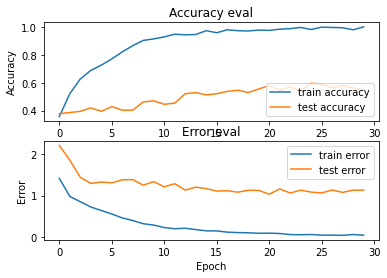

7/7 - 3s - loss: 1.2457 - accuracy: 0.5657 - 3s/epoch - 490ms/step

Test accuracy: 0.5656565427780151
Target: 1, Predicted label: [2]


In [ ]:

DATA_PATH = "data_new.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # 정확도에 대한 그래프
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # 오류에 대한 그래프
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    # 데이터 로딩 
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 입력값에 대해 차원을 증가
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):


    # build network topology
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 결과 값을 flatten 하고 Dense layer에 넣는다. 
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    # output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


def predict(model, X, y):


    # 입력값에 대한 차원을 증가한다. 4차원으로 만들어준다.
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # 예측을 한다
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # accuracy/loss 그래프를 그린다
    plot_history(history)

    # 테스트 셋의 evaluation을 한다.
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # test 셋의 샘플을 뽑는다.
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 2582, 11, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1291, 6, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 1291, 6, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 1289, 4, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 645, 2, 64)       0         
 g2D)                                                            
                                                      

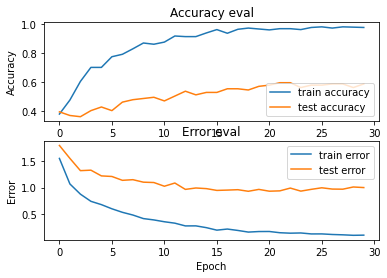

7/7 - 2s - loss: 1.2764 - accuracy: 0.4949 - 2s/epoch - 224ms/step

Test accuracy: 0.49494948983192444
Target: 1, Predicted label: [1]


In [ ]:
DATA_PATH = "data_new.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):


    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)


    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):


 
    model = tf.keras.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # 결과값을 flatten 하고 dense layer에 넣는다
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    # output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


def predict(model, X, y):



    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # 평가를 한다
    prediction = model.predict(X)

    # 제일 높은 인덱스 값을 가져 온다.
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    optimiser = tf.keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    plot_history(history)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    predict(model, X_to_predict, y_to_predict)

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# mfcc와 장르별 라벨링이 되어 있는 json 파일 경로 
DATA_PATH = "data_new.json"

def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # 리스트 값을 array로 만들어 준다. 
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # 정확도 그래프를 그린다.
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # 오류 그래프를 그린다.
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


if __name__ == "__main__":

    # 데이터를 로딩한다
    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),

        # 2nd dense layer
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),

        # 3rd dense layer
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),

        # output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    # 정확도 오류 그래프를 그린다
    plot_history(history)


JSONDecodeError: ignored

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2584, 64)          19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] 

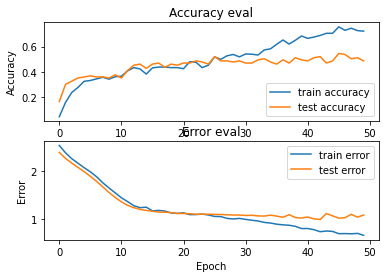

7/7 - 3s - loss: 1.0670 - accuracy: 0.5354 - 3s/epoch - 481ms/step

Test accuracy: 0.5353535413742065


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DATA_PATH = "data_new.json"


def load_data(data_path):
  """
  json 파일에서 트레이닝 데이터 셋을 로딩한다.
  : param data_path(str): json file의 경로
  : return X (ndarray): 입력값
  : return y (ndarray): 타깃값
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
  """
  training/validation 데이터 셋의 그래프를 그린다
  :param history: 모델의 과거
  """

    fig, axs = plt.subplots(2)

    # 정확도를 그래프로 그린다
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # 오류 그래프를 그린다.
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
   
  """데이터를 train, test, validation 셋으로 나눈다.
  :parma test_size(float) : 테스트 사이즈의 비율을 나눈다
  : param validation_size : validation 셋을 비율로 나눈다.
  : return X_train: 트레이닝 셋 입력값
  : return X_validation : validation 입력값
  : return X_test : 테스트 데이터 셋의 입력값
  : return y_train : 타깃 데이터 셋
  : return y_validation : 타깃 validation set
  : return y_test: target  test set
    """
    # 데이터를 로드한다.
    X, y = load_data(DATA_PATH)

    # train, test, validation으로 나눈다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
  """
  RNN-LSTM 모델을 만든다.
  :param input_shape (tuple): 입력값의 형태
  : return model: RNN-LSTM 모델
    """

    # build network topology
    model = tf.keras.Sequential()

    # 2 LSTM layers
    model.add(tf.keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))

    # dense layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)